<a href="https://colab.research.google.com/github/abhish3k4/Deep-learning-Project/blob/main/01_Python_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


what we are covering =

{1: "Data Prepare and load"
                        2: "Build model"
                        3: "Fitting the model to data (data trainning)"
                        4: "Making predictions and evaluating a model (Inference)"
                        5: "Saving and loading a model"
                        6: "Putting it all together"}


In [38]:
import torch
from torch import nn # nn contains all of PyTorch's Building Block For neural Networks
import matplotlib as mpl
import matplotlib.pyplot as plt
#check Pytorch Version
torch.__version__

'2.8.0+cu126'

## 1. Data(Preparing and loading)

Data can be almost anything... in machine learning.

* Excel Spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* Audio Like songs or podcasts
* DNA
* Text

Machine larining is a game of two parts

1. Get data into a numerical representation.
2.Build a model to learn patterns in that numerical representation


To showcase this lets create some known data using the linear regressions Formula.

We'll use a linear regression formula to make a straight line with known parameters.

In [39]:
# Create known parameters
weight = 0.7
bias = 0.3

# Creat
strat = 0
end = 1
step = 0.02
x = torch.arange(strat, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [40]:
len(x) , len(y)

(50, 50)

### Splitting data into trainnin and test sets one of the most importsant concepts in machine learning in general

Lets create a training and test set with our data



In [41]:
# Create a train/test split
train_split = int(0.8 * len(x))
x_train , y_train = x[:train_split] , y[:train_split]
x_test , y_test = x[train_split:] , y[train_split:]

len(x_train) , len(y_train) , len(x_test) , len(y_test)

(40, 40, 10, 10)

How might we better visualize our data
This is where the data explorer motto comes in
Visualize visulize visualize

In [42]:
def plot_predictions(train_data = x_train,
                      train_labels = y_train,
                      test_data = x_test,
                      test_labels = y_test,
                      predictions = None):

    plt.figure(figsize=(10,7))

    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    #Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

    #Plot predictions in red (if there are any)
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    #Show the legend
    plt.legend(prop={"size": 12})

    #Show the plot
    plt.show()

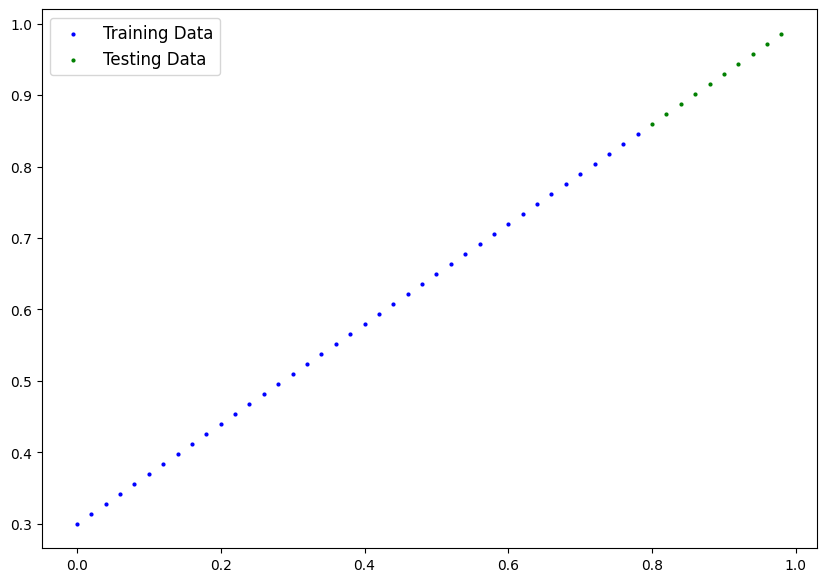

In [43]:
plot_predictions();


## 2. Build model

our first pytorch model

This one is the first pytorch model


what our model does:
Strat with random values weight & Bias
Look at training data and adjust the random values to better represent or get closer to the ideal values the weight and bias values we used to create the data

How does it do so ?

1.Graidient desent

2.Backpropogation

In [44]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in Python is inherit from nn.Module
 def __init__(self):
   super().__init__()
   self.weights = nn.Parameter(torch.randn(1,# <- Strat with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- Can this parameter be updated via gradient descent?
                                            dtype=torch.float)) #<- PyTorch loves the datatype torch.float32
   self.bias = nn.Parameter(torch.randn(1, # <- Start with a random bias and try to adjust it to the ideal bias
                                        requires_grad=True, # <- Can this parameter be updated via gradient descent?
                                        dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

 #Forward method to deifen the computation in the model
 def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
   return self.weights * x + self.bias # This is the linear Reression formula



## PyTorch model building essentials

* Torch.nn -- Contains all of the building for computational graph(A neural network can be consider as an  computational graph)
* Torch.nn.parameter - What parameter should our model try and learn , often a PyTorch layer from torch.nn will set these for us
* Torch.nn.Module - The base class for all neural network modules if you subclass it you should overwrite forward()
* torch.optim - This where the optimizer in PyTorch Live , They will help with gradient descent

* Def forward() - All nn.Module subclasses require you to overwrite forward() , this method defines what happens in the forward computation

In [45]:
 # Create a random seed
 torch.manual_seed(42)

 # Create an isntance of the model this a subclass of nn.module
 model_0 = LinearRegressionModel()

 # Check out the parameters
 list (model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [46]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [47]:
weight , bias

(0.7, 0.3)

### Making prediction using 'Torch.inference_model()'

To check our model's predictive power let's see how well it predicts y_test based on x_test

When we pass data thorugh our model, it's going to run it through the 'forward()'  method.

In [51]:
y_preds = model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [48]:
## Make prediction with model
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [49]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

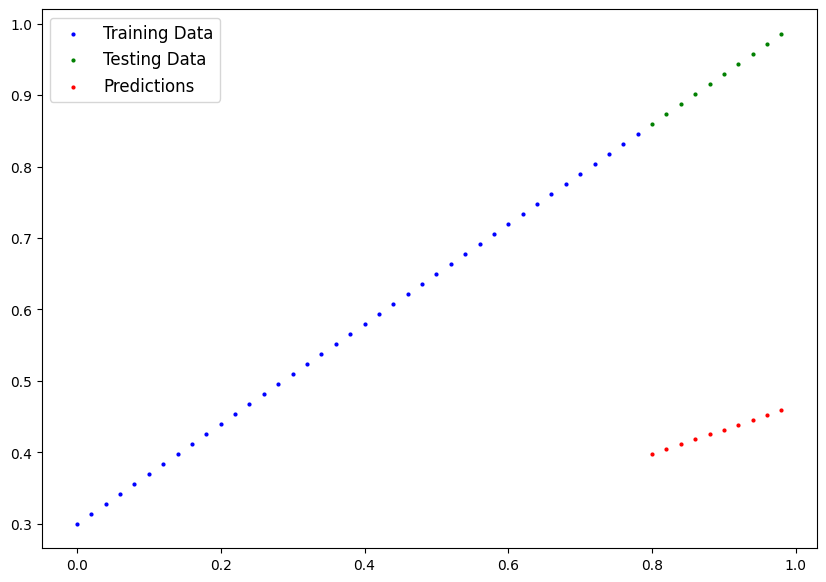

In [50]:
plot_predictions(predictions = y_preds)